### Optimal model tanlash 

### 1. Import liblaries 

In [1]:
import numpy as pd 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report



### 2. Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Maftuna\Downloads\Supplement_Sales_Weekly_Expanded.csv")
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


### 2. Data Proprocessing

In [4]:
df.columns.isnull().sum()

0

In [5]:
for col in df.columns: 
    if df[col].isnull().any():
        if df[col].dtype=='object':
            df[col].fillna(df[col].mode()[0], inplace = True)
        else:
            df[col].fillna(df[col].mean(), inplace = True)

In [6]:
df['Product Name'].unique().tolist()

['Whey Protein',
 'Vitamin C',
 'Fish Oil',
 'Multivitamin',
 'Pre-Workout',
 'BCAA',
 'Creatine',
 'Zinc',
 'Collagen Peptides',
 'Magnesium',
 'Ashwagandha',
 'Melatonin',
 'Biotin',
 'Green Tea Extract',
 'Iron Supplement',
 'Electrolyte Powder']

In [7]:
df['Platform'].value_counts(normalize=True)


Platform
iHerb      0.341925
Amazon     0.335995
Walmart    0.322080
Name: proportion, dtype: float64

In [8]:
categorical_col = ['Product Name', 'Category', 'Location', 'Platform']

for col in categorical_col:
    unique_val = df[col].unique()
    print(f" {col} ({len(unique_val)} unique valus)")
    print(list(unique_val))
    print("-" * 50)

 Product Name (16 unique valus)
['Whey Protein', 'Vitamin C', 'Fish Oil', 'Multivitamin', 'Pre-Workout', 'BCAA', 'Creatine', 'Zinc', 'Collagen Peptides', 'Magnesium', 'Ashwagandha', 'Melatonin', 'Biotin', 'Green Tea Extract', 'Iron Supplement', 'Electrolyte Powder']
--------------------------------------------------
 Category (10 unique valus)
['Protein', 'Vitamin', 'Omega', 'Performance', 'Amino Acid', 'Mineral', 'Herbal', 'Sleep Aid', 'Fat Burner', 'Hydration']
--------------------------------------------------
 Location (3 unique valus)
['Canada', 'UK', 'USA']
--------------------------------------------------
 Platform (3 unique valus)
['Walmart', 'Amazon', 'iHerb']
--------------------------------------------------


In [9]:
# Avval datetime dan yil, oy, kun chiqaramiz
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# So‘ngra LabelEncoder ishlatishdan oldin Date ustunini olib tashlang
df = df.drop('Date', axis=1)


In [10]:
y = df['Platform'].copy()
df = df.drop('Platform', axis=1)


In [11]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].nunique() <= 5:
            dummies = pd.get_dummies(df[col], prefix=col, dtype='int')
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
        else:
            df[col] = le.fit_transform(df[col])


In [12]:
df.head()

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Year,Month,Day,Location_Canada,Location_UK,Location_USA
0,14,7,143,31.98,4573.14,0.03,2,2020,1,6,1,0,0
1,13,9,139,42.51,5908.89,0.04,0,2020,1,6,0,1,0
2,6,5,161,12.91,2078.51,0.25,0,2020,1,6,1,0,0
3,11,9,140,16.07,2249.80,0.08,0,2020,1,6,1,0,0
4,12,6,157,35.47,5568.79,0.25,3,2020,1,6,1,0,0


In [13]:
# Standartlashtirish
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(df)
#X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)


In [ ]:
# Ma'lumotlarni o'quv va sinov to'plamlariga bo'lish

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3507, 11)
(877, 11)
(3507,)
(877,)


In [ ]:
# Ustun turlarini ajratish
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Transformer yaratish
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])



In [ ]:
# Modellarni aniqlang
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM (Linear Kernel)": SVC(kernel='linear', random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Har bir model uchun pipeline yasash
# Har bir model uchun pipeline yasash
results = []  # 🟢 Bu qator tashqarida turishi kerak

for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    # O'zaro tekshiruv
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = cv_scores.mean()

    # O'qitish va sinov
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Saqlash
    results.append({
        'Model': model_name,
        'CV Accuracy': mean_cv_score,
        'Test Accuracy': test_accuracy
    })

    print(f"Classification Hisobot {model_name} uchun:\n")
    print(classification_report(y_test, y_pred))
    print("\n")



Classification Hisobot Logistic Regression uchun:

              precision    recall  f1-score   support

      Amazon       0.33      0.40      0.36       295
     Walmart       0.33      0.10      0.15       282
       iHerb       0.30      0.44      0.36       300

    accuracy                           0.32       877
   macro avg       0.32      0.31      0.29       877
weighted avg       0.32      0.32      0.29       877



Classification Hisobot SVM (Linear Kernel) uchun:

              precision    recall  f1-score   support

      Amazon       0.32      0.45      0.37       295
     Walmart       0.00      0.00      0.00       282
       iHerb       0.32      0.48      0.38       300

    accuracy                           0.32       877
   macro avg       0.21      0.31      0.25       877
weighted avg       0.21      0.32      0.26       877





c:\Users\Maftuna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Maftuna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Maftuna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Hisobot SVM (RBF Kernel) uchun:

              precision    recall  f1-score   support

      Amazon       0.34      0.34      0.34       295
     Walmart       0.33      0.27      0.30       282
       iHerb       0.30      0.35      0.33       300

    accuracy                           0.32       877
   macro avg       0.32      0.32      0.32       877
weighted avg       0.32      0.32      0.32       877



Classification Hisobot K-Nearest Neighbors uchun:

              precision    recall  f1-score   support

      Amazon       0.35      0.49      0.41       295
     Walmart       0.29      0.28      0.28       282
       iHerb       0.34      0.22      0.26       300

    accuracy                           0.33       877
   macro avg       0.32      0.33      0.32       877
weighted avg       0.33      0.33      0.32       877



Classification Hisobot Naive Bayes uchun:

              precision    recall  f1-score   support

      Amazon       0.30      0.37    

In [ ]:
# Yaxshiroq vizualizatsiya qilish uchun natijalarni DataFrame-ga aylantiramiz
results_df = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)

# Natijalarni chop etish
print("Modellar aniqligi xulosasi:\n")
print(results_df)


Modellar aniqligi xulosasi:

                 Model  CV Accuracy  Test Accuracy
6        Decision Tree     0.334764       0.347777
3  K-Nearest Neighbors     0.325637       0.327252
2     SVM (RBF Kernel)     0.339608       0.322691
0  Logistic Regression     0.333332       0.315849
1  SVM (Linear Kernel)     0.340172       0.315849
5        Random Forest     0.327340       0.299886
4          Naive Bayes     0.344453       0.294185



Eng yaxshi Model: Decision Tree


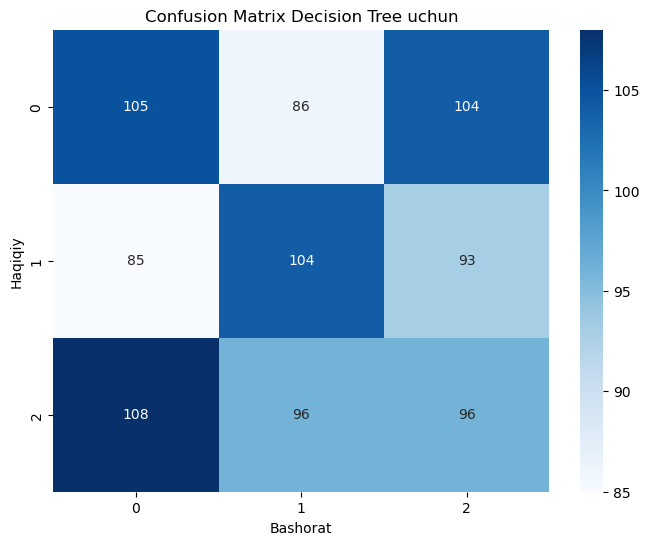

In [ ]:
# Plot Confusion Matrix for the Best Model
best_model_name = results_df.iloc[0]['Model']
print(f"\nEng yaxshi Model: {best_model_name}")

best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', models[best_model_name])
])

best_pipeline.fit(X_train, y_train)
best_y_pred = best_pipeline.predict(X_test)
best_cm = confusion_matrix(y_test, best_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Bashorat')
plt.ylabel('Haqiqiy')
plt.title(f'Confusion Matrix {best_model_name} uchun')
plt.show()


## Boosting Models

In [3]:
import lightgbm as lgb

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [5]:
cat_col = df.select_dtypes(include=['object']).columns

In [6]:
for col in cat_col:
    df[col] = df[col].astype('category')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Date            4384 non-null   category
 1   Product Name    4384 non-null   category
 2   Category        4384 non-null   category
 3   Units Sold      4384 non-null   int64   
 4   Price           4384 non-null   float64 
 5   Revenue         4384 non-null   float64 
 6   Discount        4384 non-null   float64 
 7   Units Returned  4384 non-null   int64   
 8   Location        4384 non-null   category
 9   Platform        4384 non-null   category
dtypes: category(5), float64(3), int64(2)
memory usage: 208.6 KB


In [8]:
df.columns

Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location', 'Platform'],
      dtype='object')

In [9]:
X = df.drop('Platform', axis = 1)
y = df['Platform']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
model = lgb.LGBMClassifier()

In [14]:
model

LGBMClassifier()

In [15]:
model.fit(X_train, y_train)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 3507, number of used features: 9
[LightGBM] [Info] Start training from score -1.090943
[LightGBM] [Info] Start training from score -1.132543
[LightGBM] [Info] Start training from score -1.073273


LGBMClassifier()

In [16]:
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)

In [18]:
accuracy

0.33979475484606614